In [19]:
pip install soundfile

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from scipy.fftpack import fft, fftshift

In [2]:
from suaBibSignal import *
import numpy as np
import sounddevice as sd
import matplotlib.pyplot as plt
import soundfile as sf

### Perguntar ao usuário qual número, entre 0 e 9 ele quer digitar

In [3]:
numero = int(input("Qual n° entre 0 e 9 você deseja? \n"))

Qual n° entre 0 e 9 você deseja? 
9


### Emitir por alguns segundos as duas frequências relativas ao número escolhido.

In [4]:
frequenciaPorNumero = {
    1:[1206, 697],
    2:[1339,697],
    3:[1477,697],
    4:[1206,770],
    5:[1339,770],
    6:[1477,770],
    7:[1206,852],
    8:[1339,852],
    9:[1477,852],
    0:[1339,941]
}

In [5]:
def generateSin(freq, time, fs):
    n = time*fs #numero de pontos
    x = np.linspace(0.0, time, n)  # eixo do tempo
    s = np.sin(freq*x*2*np.pi)
    plt.figure()
    plt.plot(x,s)
    return (x, s)

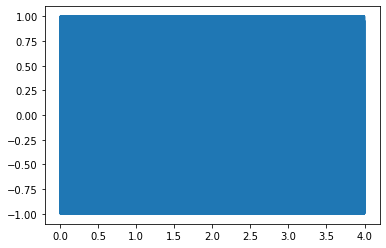

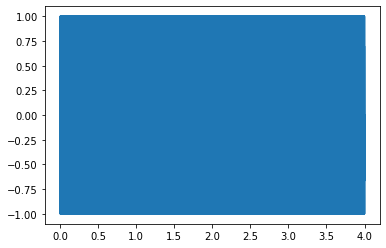

In [6]:
T = 4
x1, s1 = generateSin(frequenciaPorNumero[numero][0], T, 44100)
x2, s2 = generateSin(frequenciaPorNumero[numero][1], T, 44100)
som = s1 + s2

In [7]:
#leituara do arquivo audio
fs = 44100   # taxa de amostagem (sample rate)
sd.default.samplerate = fs
sd.default.channels = 1
audio = som
yAudio = audio[:10]
samplesAudio = len(yAudio)
sd.play(audio)
sd.wait()

### Plotar o gráfico no domínio do tempo duas frequências somadas.


Text(0.5, 0, 't')

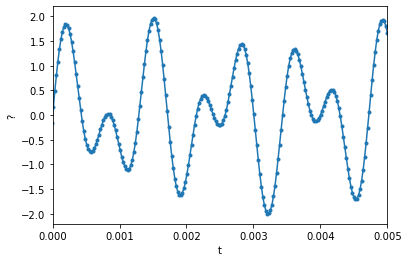

In [17]:
t   = np.linspace(-T/2,T/2,T*fs)
plt.figure()
plt.plot(t, som, '.-')
plt.xlim(0, 0.005)
plt.ylabel("?")
plt.xlabel("t")

### Plotar o gráfico no domínio da frequência do sinal emitido (transformada de Fourier)

In [19]:
def calcFFT(signal, fs):
    # https://docs.scipy.org/doc/scipy/reference/tutorial/fftpack.html
    #y  = np.append(signal, np.zeros(len(signal)*fs))
    N  = len(signal)
    T  = 1/fs
    xf = np.linspace(-1.0/(2.0*T), 1.0/(2.0*T), N)
    yf = fft(signal)
    return(xf, fftshift(yf))

<ipython-input-30-1bae7fe3bb7e>:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(X,np.abs(Y))


<StemContainer object of 3 artists>

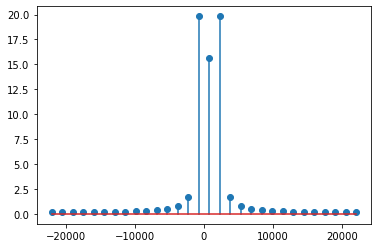

In [30]:

X, Y = calcFFT(som[:30],fs)
plt.figure()
plt.stem(X,np.abs(Y))
#plt.xlim(-1.6e3, 1.6e3)


In [30]:
max(X)



22050.0